In [6]:
!pip install shap



In [7]:
import pickle
import shap
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# Load data
df = pd.read_csv("clean_dataset.csv")

# Load encoders
with open("feature_encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Load model
with open("lightgbm_price_model.pkl", "rb") as f:
    model = pickle.load(f)


In [9]:
categorical_cols = encoders.keys()

df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = encoders[col].transform(df_encoded[col])


In [10]:
X = df_encoded.drop(columns=["price"])


In [13]:
encoders.keys()


dict_keys(['airline', 'source_city', 'destination_city', 'stops', 'class'])

In [14]:
df_encoded = df.copy()

for col, encoder in encoders.items():
    df_encoded[col] = encoder.transform(df_encoded[col])


In [15]:
columns_to_drop = [
    "flight",
    "departure_time",
    "arrival_time"
]

df_encoded = df_encoded.drop(columns=columns_to_drop)


In [16]:
X = df_encoded.drop(columns=["price"])


In [19]:
print(X.dtypes)


airline               int32
source_city           int32
stops                 int32
destination_city      int32
class                 int32
duration            float64
days_left             int64
dtype: object


In [18]:
X = X.drop(columns=["Unnamed: 0"])


In [20]:
X_shap = X.sample(1000, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)


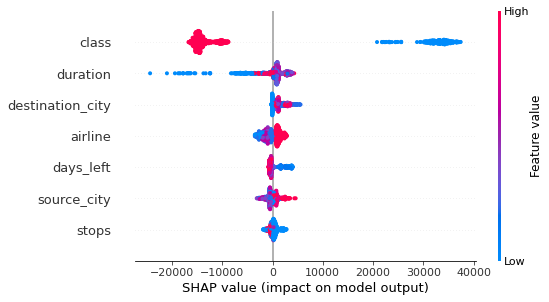

In [21]:
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="dot",
    show=True
)

